### TP : Traitement du Signal
## Objectif

L'objectif de ce TP est de mesurer la vitesse du son en utilisant le matériel fourni.

## Matériel

- Haut-parleur
- Deux microphones
- Ordinateur avec Python et Jupyter Notebook installés

## Questions

1. Comment peut-on mesurer la vitesse du son ?
2. Comment isoler le signal émis par l'haut-parleur et comment peut-on minimiser les bruits captés par les microphones ?
3. Utiliser les différents signaux afin de déduire lequel est le plus qualitatif.

## Code

Voici le code Python à utiliser pour générer les signaux et enregistrer le son :

```
# Importer les bibliothèques nécessaires
# Gestion du son
import sounddevice as sd
import soundfile as sf
# Bibliothèques pour analyse traitement du signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np
#Bibliothèques pour générer, acquérir les sons
import traitesignfip


traitesignfip.record_microphone("noise") #Acquisition du son des microphones durant 5 secondes, l'haut-parleur émet le son passé en argument pendant 1 seconde

left,right = traitesignfip.read_signal('enregistrement.wav')

#La ligne ci-dessus permet de séparer les deux canaux (Left and Right) car chacun des 2 micros enregistre sur un canal différent. 
#Ainsi deux tableaux permettent de traiter les valeurs de chaque micro. (Tableaux 'left' et 'right')
```


# Code python permettant de réaliser la mesure du son

ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred


Temps PIC Gauche : 3.4738775510204083
Temps PIC Droit : 3.4738775510204083
Delta : 0.0
Vitesse : inf m/s


/tmp/ipykernel_10517/1506731363.py:55: RuntimeWarning: divide by zero encountered in double_scalars
  print("Vitesse : "+str(distance/delta_t)+" m/s")


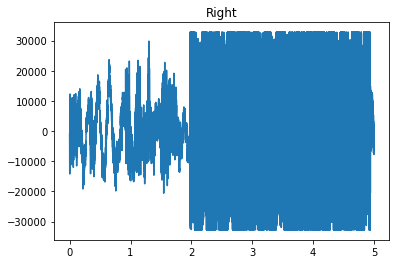

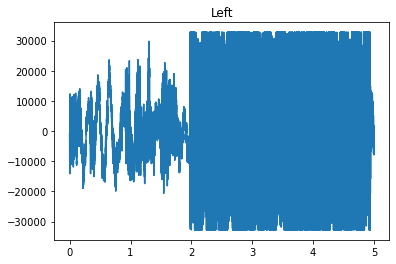

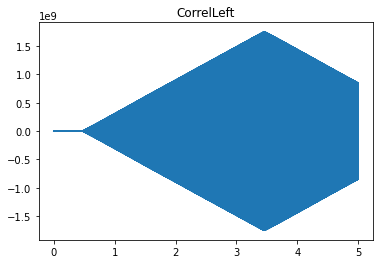

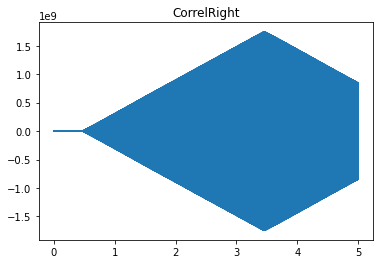

In [7]:
# Importer les bibliothèques nécessaires
# Gestion du son
import sounddevice as sd
import soundfile as sf
# Bibliothèques pour analyse traitement du signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np
#Bibliothèques pour générer, acquérir les sons
import traitesignfip
from importlib import reload
reload(traitesignfip)

traitesignfip.record_microphone("sinus",3)

data_left, data_right = traitesignfip.read_signal('enregistrement.wav')

fs = 44100 # fréquence d'échantillonage
N=len(data_left) #nombre d'échantillions 
n = np.arange(0,N)/fs   #on divise par la fréquence d'échantillonage pour etre mieux dans l'échelle 

distance=0.80#Distance entre les deux micros en mètre

#affichage du channel 1 
plt.figure()
plt.title("Right")
plt.plot(n,data_right)
plt.figure()
plt.title("Left")
plt.plot(n,data_left)

corrLeft=np.correlate(data_left,traitesignfip.samples, mode='same')
corrRight=np.correlate(data_right,traitesignfip.samples, mode='same')
# Calcul de la corrélation croisée entre les deux signaux

plt.figure()
plt.title("CorrelLeft")
plt.plot(n,corrLeft)
#Intercorrélation gauche 
plt.figure()
plt.title("CorrelRight")
plt.plot(n,corrRight)
#Intercorrélation droite 

# Trouver l'indice du maximum de la corrélation
max_index_Left = np.argmax(corrLeft)/fs
max_index_Right = np.argmax(corrRight)/fs

delta_t = delta = np.abs(max_index_Left - max_index_Right)

print("Temps PIC Gauche : "+str(max_index_Left))
print("Temps PIC Droit : "+str(max_index_Right))

print("Delta : "+str(delta_t))
print("Vitesse : "+str(distance/delta_t)+" m/s")


ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred


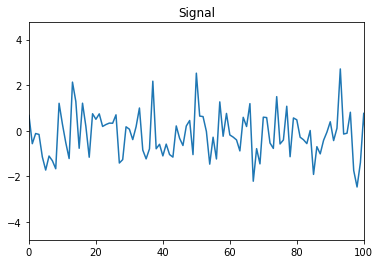

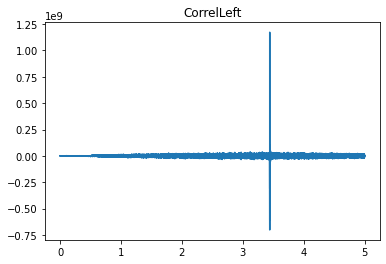

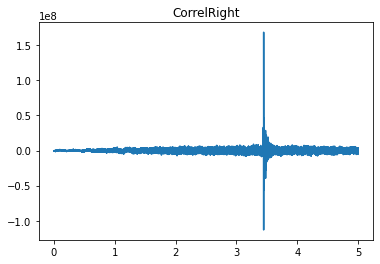

Temps PIC Gauche : 3.442698412698413
Temps PIC Droit : 3.4476870748299318
Delta : 0.0049886621315189394
Vitesse : 340.77272727275016 m/s


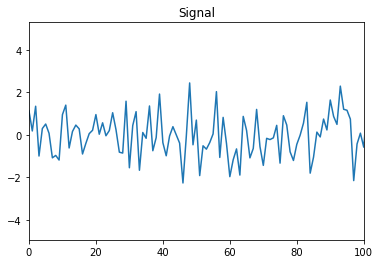

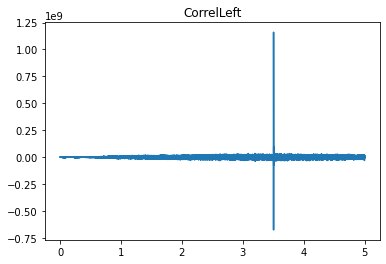

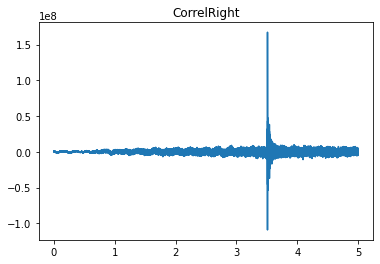

Temps PIC Gauche : 3.5056462585034014
Temps PIC Droit : 3.5106349206349208
Delta : 0.0049886621315193835
Vitesse : 340.7727272727198 m/s


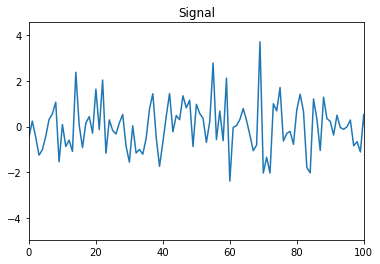

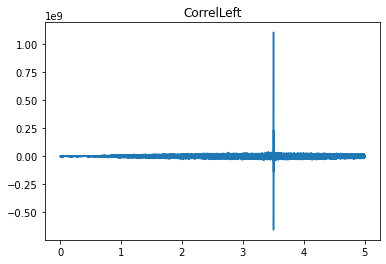

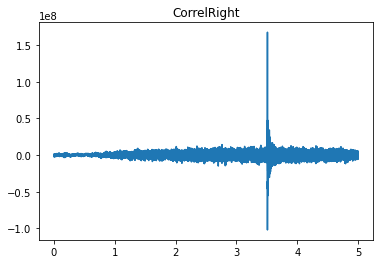

Temps PIC Gauche : 3.504920634920635
Temps PIC Droit : 3.5099092970521544
Delta : 0.0049886621315193835
Vitesse : 340.7727272727198 m/s
Vitesse moyenne Noise 2 seconde : 340.7727272727299


In [38]:
# Importer les bibliothèques nécessaires
# Gestion du son
import sounddevice as sd
import soundfile as sf
# Bibliothèques pour analyse traitement du signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np
#Bibliothèques pour générer, acquérir les sons
import traitesignfip
from importlib import reload
reload(traitesignfip)
vitesse_moyenne=0

for x in range(3):
    traitesignfip.record_microphone("whitenoise",3)

    data_left, data_right = traitesignfip.read_signal('enregistrement.wav')

    fs = 44100 # fréquence d'échantillonage
    N=len(data_left) #nombre d'échantillions 
    n = np.arange(0,N)/fs   #on divise par la fréquence d'échantillonage pour etre mieux dans l'échelle 

    distance=1.70#Distance entre les deux micros en mètre

    corrLeft=np.correlate(data_left,traitesignfip.samples, mode='same')
    corrRight=np.correlate(data_right,traitesignfip.samples, mode='same')

    plt.figure()
    plt.title("Signal")
    plt.plot(traitesignfip.samples)
    plt.xlim(0,100)
    plt.show()

    # Calcul de la corrélation croisée entre les deux signaux
    plt.figure()
    plt.title("CorrelLeft")
    plt.plot(n,corrLeft)
    plt.show()
    #Intercorrélation gauche 
    plt.figure()
    plt.title("CorrelRight")
    plt.plot(n,corrRight)
    plt.show()
    #Intercorrélation droite 
    # Trouver l'indice du maximum de la corrélation
    max_index_Left = np.argmax(corrLeft)/fs
    max_index_Right = np.argmax(corrRight)/fs

    delta_t  = np.abs(max_index_Left - max_index_Right)

    print("Temps PIC Gauche : "+str(max_index_Left))
    print("Temps PIC Droit : "+str(max_index_Right))

    print("Delta : "+str(delta_t))
    print("Vitesse : "+str(distance/delta_t)+" m/s")
    vitesse_moyenne+=distance/delta_t

print("Vitesse moyenne Noise 2 seconde : "+str(vitesse_moyenne/3))

# Sans haut-parleur : Utiliser un clap de main et faire la corrélation entre les deux signaux et récupérer la valeur max

Delta t : 0.39435374149659863
Vitesse : 2.535794376401587m/s


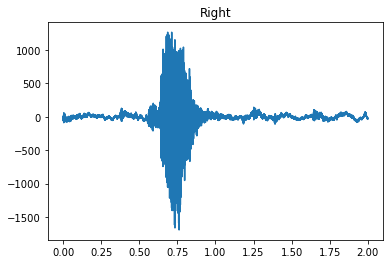

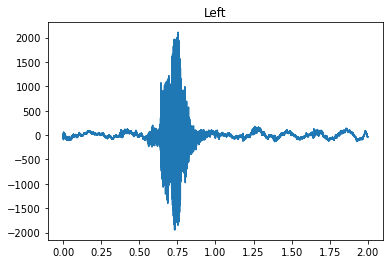

In [257]:
# Importer les bibliothèques nécessaires
# Gestion du son
import sounddevice as sd
import soundfile as sf
# Bibliothèques pour analyse traitement du signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np
#Bibliothèques pour générer, acquérir les sons
import traitesignfip
from importlib import reload
reload(traitesignfip)

traitesignfip.record()

data_left, data_right = traitesignfip.read_signal()

fs = 44100 # fréquence d'échantillonage
N=len(data_left) #nombre d'échantillions 
n = np.arange(0,N)/fs   #on divise par la fréquence d'échantillonage pour etre mieux dans l'échelle 

distance=1#Distance entre les deux micros en mètre


plt.figure()
plt.title("Right")
plt.plot(n,data_right)
plt.figure()
plt.title("Left")
plt.plot(n,data_left)

corr = scipy.signal.correlate(data_right,data_left,mode="same")
corr2 = scipy.signal.correlate(data_left,data_right,mode="same")



delta_t = min(np.argmax(corr)/44100,np.argmax(corr2)/44100)

print("Delta t : "+str(delta_t))
print("Vitesse : "+str(distance/delta_t)+" m/s")

